In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [4]:
df_min=df[df['4']==1]

In [5]:
df_min.to_csv('iris0_minority_train.csv',index=False)
df_min=pd.read_csv('iris0_minority_train.csv')

In [6]:
df_majority=df[df['4']==0]
df_majority.to_csv('iris0_majority_train.csv',index=False)
df_majority=pd.read_csv('iris0_majority_train.csv')

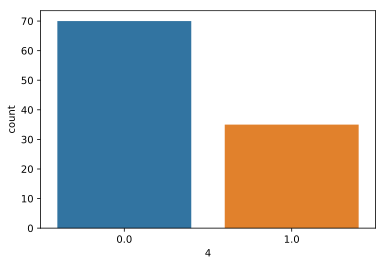

In [7]:
%matplotlib inline
sns.countplot(x='4',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(29, 5, 5)
(29, 5)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(5))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
17/17 [==============================] - 3s 176ms/step - loss: 0.2151
Epoch 2/500
17/17 [==============================] - 0s 944us/step - loss: 0.2095
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 0.2031
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1964
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1897
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 8/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1696
Epoch 9/500
17/17 [==============================] - 0s 2ms/step - loss: 0.1631
Epoch 10/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1566
Epoch 11/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1502
Epoch 12/500
17/17 [==============================] - 0s 1ms/step - loss: 0.1440
Epoch 13/500
17/17 [=============

17/17 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 103/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 104/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 105/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 106/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 107/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 108/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 109/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 110/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 111/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 112/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0367
Epoch 113/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 114/500
17/17 [=========

17/17 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 203/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 204/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 205/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 206/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 207/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 208/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0298
Epoch 209/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 210/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 211/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 212/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 213/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 214/500
17/17 [=========

Epoch 302/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 303/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 304/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 305/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 306/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 307/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 308/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 309/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 310/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 311/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 312/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 313/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 314/500
17

Epoch 402/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 403/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 404/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 405/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 406/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 407/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 408/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 409/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 410/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 411/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 412/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 413/500
17/17 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 414/500
17

In [14]:
model.save('7-24-2019-iris0-v1.h5')

In [15]:
Xtrain.shape

(17, 5, 5)

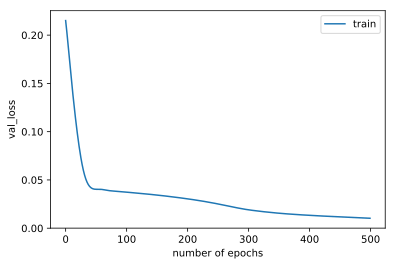

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

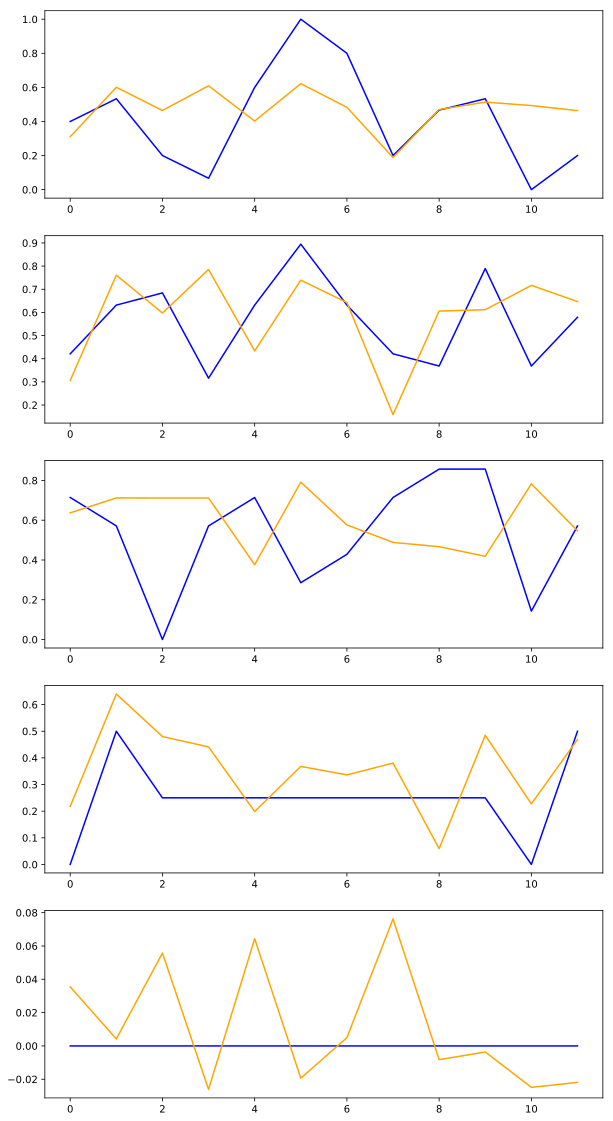

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.31048703,  0.30594057,  0.63710034,  0.2177767 ,  0.03547024],
       [ 0.6004843 ,  0.7608209 ,  0.71219444,  0.63973284,  0.0041933 ],
       [ 0.4645517 ,  0.597301  ,  0.71170664,  0.4801793 ,  0.0557569 ],
       [ 0.6095538 ,  0.78532386,  0.7117969 ,  0.44111764, -0.02608826],
       [ 0.4021781 ,  0.43360278,  0.3760894 ,  0.19869138,  0.06435253],
       [ 0.6218053 ,  0.7392472 ,  0.7914139 ,  0.36806697, -0.01938516],
       [ 0.48301953,  0.6426391 ,  0.5761423 ,  0.33623868,  0.00495315],
       [ 0.18831086,  0.15871893,  0.48836613,  0.38050008,  0.07621157],
       [ 0.4701372 ,  0.60565525,  0.4668073 ,  0.05932313, -0.00824115],
       [ 0.5135445 ,  0.6116394 ,  0.4183969 ,  0.48477182, -0.00363377],
       [ 0.4933053 ,  0.716617  ,  0.78283024,  0.22744693, -0.0248735 ],
       [ 0.46360803,  0.64662355,  0.5467915 ,  0.46896136, -0.02188925]],
      dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

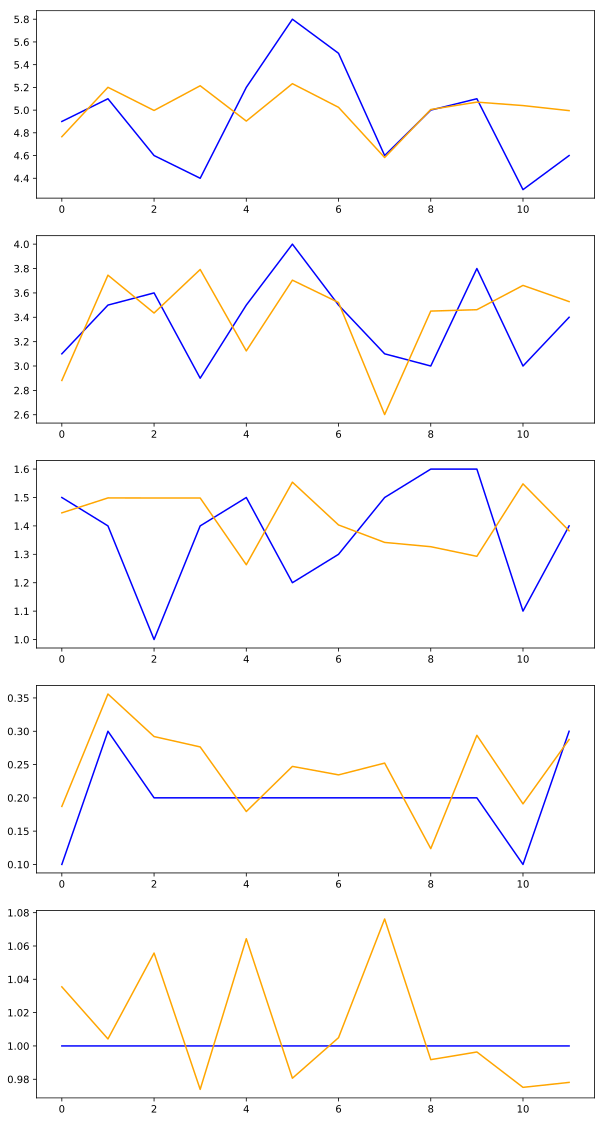

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.31048703,  0.30594057,  0.63710034,  0.2177767 ,  0.03547024],
       [ 0.6004843 ,  0.7608209 ,  0.71219444,  0.63973284,  0.0041933 ],
       [ 0.4645517 ,  0.597301  ,  0.71170664,  0.4801793 ,  0.0557569 ],
       [ 0.6095538 ,  0.78532386,  0.7117969 ,  0.44111764, -0.02608826],
       [ 0.4021781 ,  0.43360278,  0.3760894 ,  0.19869138,  0.06435253],
       [ 0.6218053 ,  0.7392472 ,  0.7914139 ,  0.36806697, -0.01938516],
       [ 0.48301953,  0.6426391 ,  0.5761423 ,  0.33623868,  0.00495315],
       [ 0.18831086,  0.15871893,  0.48836613,  0.38050008,  0.07621157],
       [ 0.4701372 ,  0.60565525,  0.4668073 ,  0.05932313, -0.00824115],
       [ 0.5135445 ,  0.6116394 ,  0.4183969 ,  0.48477182, -0.00363377],
       [ 0.4933053 ,  0.716617  ,  0.78283024,  0.22744693, -0.0248735 ],
       [ 0.46360803,  0.64662355,  0.5467915 ,  0.46896136, -0.02188925]],
      dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)